# Desafío: Analizando Texto sobre Ciencia de Datos

> *En este cuaderno, experimentamos con el uso de diferentes URL - artículo de Wikipedia sobre Aprendizaje Automático. Puedes ver que, a diferencia de Ciencia de Datos, este artículo contiene muchos términos, lo que hace que el análisis sea más problemático. Necesitamos idear otra forma de limpiar los datos después de realizar la extracción de palabras clave, para deshacernos de algunas combinaciones de palabras frecuentes pero poco significativas.*

En este ejemplo, hagamos un ejercicio sencillo que cubre todos los pasos de un proceso tradicional de ciencia de datos. No necesitas escribir ningún código, solo puedes hacer clic en las celdas a continuación para ejecutarlas y observar el resultado. Como desafío, se te anima a probar este código con diferentes datos.

## Objetivo

En esta lección, hemos estado discutiendo diferentes conceptos relacionados con la Ciencia de Datos. Intentemos descubrir más conceptos relacionados haciendo un poco de **minería de texto**. Comenzaremos con un texto sobre Ciencia de Datos, extraeremos palabras clave de él y luego intentaremos visualizar el resultado.

Como texto, usaré la página sobre Ciencia de Datos de Wikipedia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Paso 1: Obtener los Datos

El primer paso en todo proceso de ciencia de datos es obtener los datos. Usaremos la biblioteca `requests` para hacerlo:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Paso 2: Transformar los datos

El siguiente paso es convertir los datos en una forma adecuada para su procesamiento. En nuestro caso, hemos descargado el código fuente HTML de la página y necesitamos convertirlo en texto plano.

Hay muchas maneras de hacerlo. Usaremos el objeto [HTMLParser](https://docs.python.org/3/library/html.parser.html) incorporado más simple de Python. Necesitamos crear una subclase de la clase `HTMLParser` y definir el código que recolectará todo el texto dentro de las etiquetas HTML, excepto las etiquetas `<script>` y `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Paso 3: Obtener información

El paso más importante es convertir nuestros datos en una forma de la que podamos extraer información. En nuestro caso, queremos extraer palabras clave del texto y ver cuáles son más significativas.

Usaremos una biblioteca de Python llamada [RAKE](https://github.com/aneesha/RAKE) para la extracción de palabras clave. Primero, instalemos esta biblioteca en caso de que no esté presente:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


La funcionalidad principal está disponible desde el objeto `Rake`, que podemos personalizar utilizando algunos parámetros. En nuestro caso, estableceremos la longitud mínima de una palabra clave en 5 caracteres, la frecuencia mínima de una palabra clave en el documento en 3, y el número máximo de palabras en una palabra clave en 2. Siéntete libre de experimentar con otros valores y observar el resultado.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Obtuvimos una lista de términos junto con su grado de importancia asociado. Como puedes ver, las disciplinas más relevantes, como aprendizaje automático y big data, están presentes en los primeros puestos de la lista.

## Paso 4: Visualización del Resultado

Las personas pueden interpretar mejor los datos en forma visual. Por lo tanto, a menudo tiene sentido visualizar los datos para extraer algunas conclusiones. Podemos usar la biblioteca `matplotlib` en Python para graficar una distribución simple de las palabras clave con su relevancia:


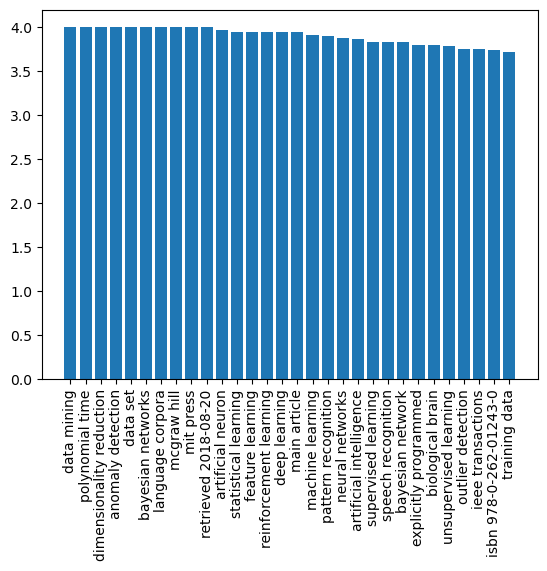

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Hay, sin embargo, una manera aún mejor de visualizar las frecuencias de palabras: usar **Word Cloud**. Necesitaremos instalar otra biblioteca para graficar la nube de palabras a partir de nuestra lista de palabras clave.


In [71]:
!{sys.executable} -m pip install wordcloud

El objeto `WordCloud` es responsable de recibir ya sea el texto original o una lista precomputada de palabras con sus frecuencias, y devuelve una imagen, que luego puede ser mostrada usando `matplotlib`:


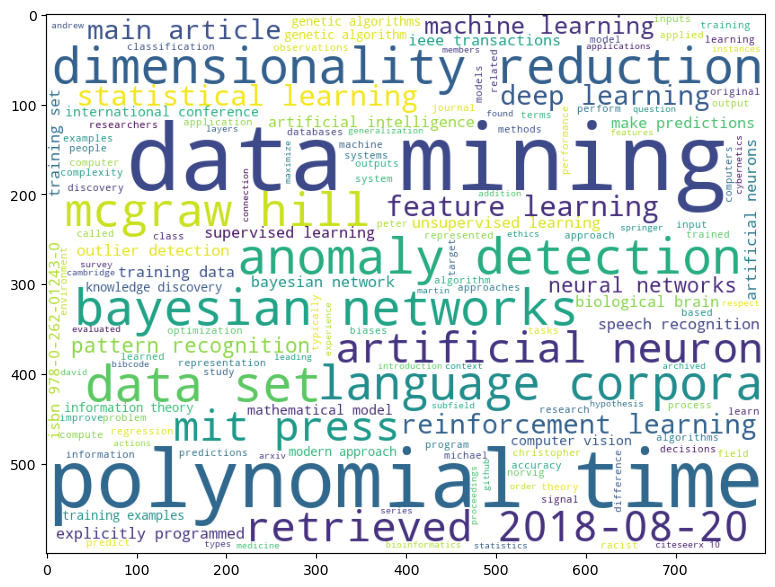

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

También podemos pasar el texto original a `WordCloud` - veamos si podemos obtener un resultado similar:


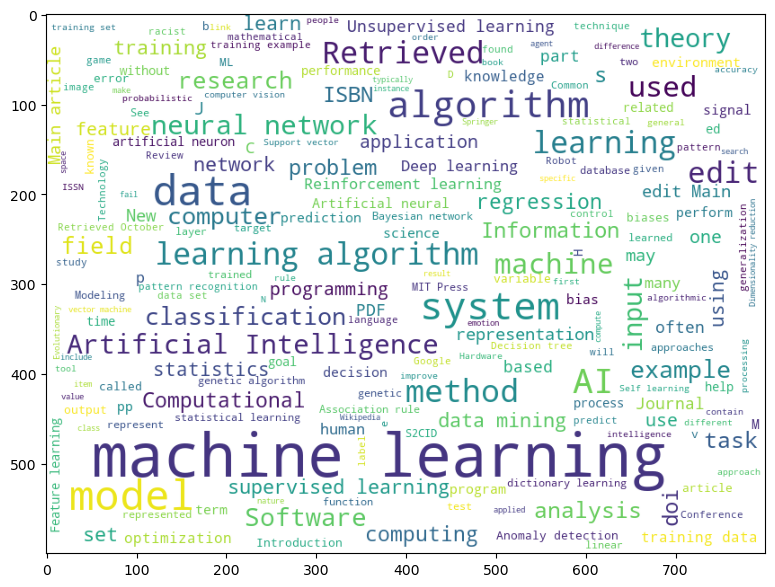

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Puedes ver que la nube de palabras ahora luce más impresionante, pero también contiene mucho ruido (por ejemplo, palabras no relacionadas como `Retrieved on`). Además, obtenemos menos palabras clave que consisten en dos palabras, como *data scientist* o *computer science*. Esto se debe a que el algoritmo RAKE hace un mejor trabajo al seleccionar buenas palabras clave del texto. Este ejemplo ilustra la importancia de la preprocesamiento y limpieza de datos, ya que una imagen clara al final nos permitirá tomar mejores decisiones.

En este ejercicio hemos pasado por un proceso sencillo de extraer algo de significado de un texto de Wikipedia, en forma de palabras clave y nube de palabras. Este ejemplo es bastante simple, pero demuestra bien todos los pasos típicos que un científico de datos seguirá al trabajar con datos, comenzando desde la adquisición de datos hasta la visualización.

En nuestro curso discutiremos todos esos pasos en detalle.



---

**Descargo de responsabilidad**:  
Este documento ha sido traducido utilizando el servicio de traducción automática [Co-op Translator](https://github.com/Azure/co-op-translator). Si bien nos esforzamos por lograr precisión, tenga en cuenta que las traducciones automáticas pueden contener errores o imprecisiones. El documento original en su idioma nativo debe considerarse como la fuente autorizada. Para información crítica, se recomienda una traducción profesional realizada por humanos. No nos hacemos responsables de malentendidos o interpretaciones erróneas que puedan surgir del uso de esta traducción.
